# Training the Logistic Regression model on the Iris Dataset
by Arslan Saeed

## Introduction and Motivation 

Improving upon supervised learning algorithms such as the Adaline and the Perceptron, the logistic regression model utilizes some useful properties of the logarithmic function to achieve a learning outcome which is effective on linearly inseperable features but also provides metrics for confidence. The logistic regression model follows the same intuition as the Adaline and Perceptron in that it takes as an input a sample consisting of a set of features with accompanying weights. The weights are initialized to small random values and put through an activation function which is essentially the key decision maker. The weights are also incremently improved until convergence to a finite value using a gradient descent approach in the cost function. 

## The data 
The dataset used for this demonstration is Fisher's famous Iris flower dataset which is a labeled dataset consisting of four features that document flower measurements: sepal length, sepal width, petal length, petal width. The labels/classes are three species: Iris Virginica, Iris Setosa, and Iris Versicolor. 

## The Algorithm
The key to understanding logistic regression is to understand the mathematical properties of the logit function. The 'logit' function refers to the inverse of the natural logarithm of the odds ration which defines the probability of some positive event occurring. Performing some algebra on the logit function, we are able to isolate the variable 'p' which describes probability. In addition, we may replace the odds ratio used to develop the function with a function of our choice. The final result is called the sigmoid function which the logistic regression algorithms treats as an activation function.

$$\phi(z) = (1/1+e^{-z})$$

The useful property of this function is that its limits tend towards 1 as z increases and towards 0 as z decreases, lending itself well to classification problems. The next mechanism to consider is the computation of the cost function shown below: 

$$J(w) = - \sum_{i=1}^{n}[y^{(i)}ln(\phi (z^{(i)}))+(1-y^{(i)})ln(1-\phi (z^{(i)}))]$$

The useful properties of this function are that its limit tend rapidly to infinity when the sigmoid function yields values close to 1 for a sample labeled as 0, and rapidly towards zero when it yields values close to 0 for a sample labeled as 0. The inverse is true as well, and so the properties of this function make it suitable for accurately computing cost functions in classification problems.  

## Code 
The code that follows uses sci-kit-learn's implementation of logistic regression to classify Iris flowers using all combinations of features and a final discussion on their relative accuracies concludes this demonstration. 

In [156]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

# import training data 

df = pd.read_csv('iris.csv', header = None, names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

# split data into training and test as per the 80/20 ratio convention. 

y = df.Species
X = df.drop('Species', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [157]:
# function to compute the accuracy of a model using the 'score' parameter and a list holding the respective scores

def get_results(X_train, X_test, y_train, y_test):
    """Retrieval of logistic regression training model results
    Input: X_train [List[List]] : features for training
    X_test [List[List]] : features for testing
    y_train [List] : labels for training data
    y_test [List] : labels for validating test samples
    
    Output: 
    [iterations[Int], probabilities[List[Int]], score[Double], decision_function[List[Double]]]
    """
    
    model = LogisticRegression(verbose = 1, penalty='l1', max_iter=1000)
    model.fit(X_train, y_train)
    model.predict(X_test)
    iterations = model.n_iter_
    probs = model.predict_proba(X_test)
    score = model.score(X_test, y_test)
    dec_func = model.decision_function(X_test)
    return [iterations, probs, score, dec_func]
    
results = []

### Two Features at a time

In [158]:
# Using sepal length, sepal width 

X_train_1 = X_train.iloc[:, [0,1]].values
X_test_1 = X_test.iloc[:, [0,1]].values
results.append(get_results(X_train_1, X_test_1, y_train, y_test))


[LibLinear]

In [159]:
# Using sepal length, petal length 

X_train_2 = X_train.iloc[:, [0,2]].values
X_test_2 = X_test.iloc[:, [0,2]].values
results.append(get_results(X_train_2, X_test_2, y_train, y_test))

[LibLinear]

In [160]:
# Using sepal length, petal width

X_train_3 = X_train.iloc[:, [0,3]].values
X_test_3 = X_test.iloc[:, [0,3]].values
results.append(get_results(X_train_3, X_test_3, y_train, y_test))

[LibLinear]

In [161]:
# Using sepal width, petal length

X_train_4 = X_train.iloc[:, [1,2]].values
X_test_4 = X_test.iloc[:, [1,2]].values
results.append(get_results(X_train_4, X_test_4, y_train, y_test))

[LibLinear]

In [162]:
# Using sepal width, petal width 

X_train_5 = X_train.iloc[:, [1,3]].values
X_test_5 = X_test.iloc[:, [1,3]].values
results.append(get_results(X_train_5, X_test_5, y_train, y_test))

[LibLinear]

In [163]:
# Using petal length, petal width 

X_train_6 = X_train.iloc[:, [2,3]].values
X_test_6 = X_test.iloc[:, [2,3]].values
results.append(get_results(X_train_6, X_test_6, y_train, y_test))

[LibLinear]

### Three Features at a time

In [164]:
X_train_7 = X_train.iloc[:, [0,1,2]].values
X_test_7 = X_test.iloc[:, [0,1,2]].values
results.append(get_results(X_train_7, X_test_7, y_train, y_test))

[LibLinear]

In [165]:
X_train_8 = X_train.iloc[:, [0,1,3]].values
X_test_8 = X_test.iloc[:, [0,1,3]].values
results.append(get_results(X_train_8, X_test_8, y_train, y_test))

[LibLinear]

In [166]:
X_train_9 = X_train.iloc[:, [0,2,3]].values
X_test_9 = X_test.iloc[:, [0,2,3]].values
results.append(get_results(X_train_9, X_test_9, y_train, y_test))

[LibLinear]

In [167]:
X_train_10 = X_train.iloc[:, [1,2,3]].values
X_test_10 = X_test.iloc[:, [1,2,3]].values
results.append(get_results(X_train_10, X_test_10, y_train, y_test))

[LibLinear]

### All features at once

In [168]:
X_train_11 = X_train.iloc[:, [0,1,2,3]].values
X_test_11 = X_test.iloc[:, [0,1,2,3]].values
results.append(get_results(X_train_11, X_test_11, y_train, y_test))

[LibLinear]

## Analysis
After training the logistic regression model for all combinations of features, we are able to use the sci-kit-learn implementations built-in metrics for each model to analyze the results. One such metric is the number of iterations needed for convergence of the gradient descent function. 

In [169]:
#slice results 

#slice = [arr[i][0:2] for i in range(0,2)]

iterations = [results[i][0] for i in range(len(results))]
probs = [results[i][1] for i in range(len(results))]
scores = [results[i][2] for i in range(len(results))]
decision_func_results = [results[i][3] for i in range(len(results))]

from astropy.table import Table, Column 

res1 = Table()

res1['Features Used'] = ['SL/SW', 'SL/PL', 'SL/PW', 'SW/PL', 'SW/PW', 'PL/PW', 'SL/SW/PL','SL/SW/PW' ,'SL/PL/PW', 'SW/PL/PW', 'ALL']
res1['max iterations'] = iterations   
res1['Score'] = scores

print(res1)

Features Used max iterations [1]       Score       
------------- ------------------ ------------------
        SL/SW                 90                0.8
        SL/PL                144                1.0
        SL/PW                 82 0.9333333333333333
        SW/PL                 86 0.9333333333333333
        SW/PW                 84 0.9666666666666667
        PL/PW                 97 0.9666666666666667
     SL/SW/PL                 70                1.0
     SL/SW/PW                 68 0.9666666666666667
     SL/PL/PW                102                1.0
     SW/PL/PW                 60 0.9666666666666667
          ALL                 52 0.9666666666666667


As previously stated, one of the key features of the logistic regression model is it's ability to provide some metric on the confidence level of a result. The sci-kit-learn library provides the quantity z computed and passed to the decision function and the resultant probablity of correctness. The plots below show the trend and demonstrates the benefits provided by using the logit function with input z as an activation function. 

Text(0.5,1,'Petal Length/Petal Width')

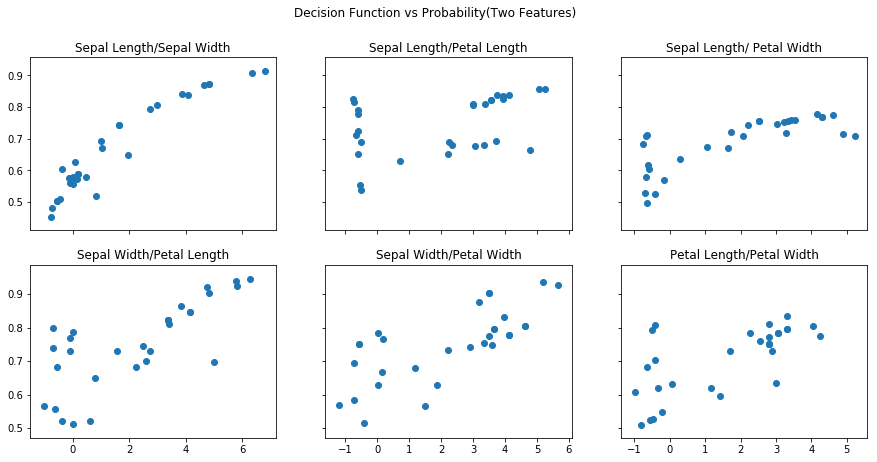

In [170]:
# organize data 

sl_sw_probs = [max(probs[0][i]) for i in range(30)] 
sl_sw_dec = [max(decision_func_results[0][i]) for i in range(30)]

sl_pl_probs = [max(probs[1][i]) for i in range(30)] 
sl_pl_dec = [max(decision_func_results[1][i]) for i in range(30)]

sl_pw_probs = [max(probs[2][i]) for i in range(30)] 
sl_pw_dec = [max(decision_func_results[2][i]) for i in range(30)]

sw_pl_probs = [max(probs[3][i]) for i in range(30)] 
sw_pl_dec = [max(decision_func_results[3][i]) for i in range(30)]

sw_pw_probs = [max(probs[4][i]) for i in range(30)] 
sw_pw_dec = [max(decision_func_results[4][i]) for i in range(30)]

pl_pw_probs = [max(probs[5][i]) for i in range(30)] 
pl_pw_dec = [max(decision_func_results[5][i]) for i in range(30)]

# Plots using two features at a time 
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(15,7))
f.suptitle('Decision Function vs Probability(Two Features)')
ax1.scatter(sl_sw_dec, sl_sw_probs)
ax1.set_title('Sepal Length/Sepal Width')
ax2.scatter(sl_pl_dec, sl_pl_probs)
ax2.set_title('Sepal Length/Petal Length')
ax3.scatter(sl_pw_dec, sl_pw_probs)
ax3.set_title('Sepal Length/ Petal Width')
ax4.scatter(sw_pl_dec, sw_pl_probs)
ax4.set_title('Sepal Width/Petal Length')
ax5.scatter(sw_pw_dec, sw_pw_probs)
ax5.set_title('Sepal Width/Petal Width')
ax6.scatter(pl_pw_dec, pl_pw_probs)
ax6.set_title('Petal Length/Petal Width')

Text(0.5,1,'Sepal Width/Petal Length')

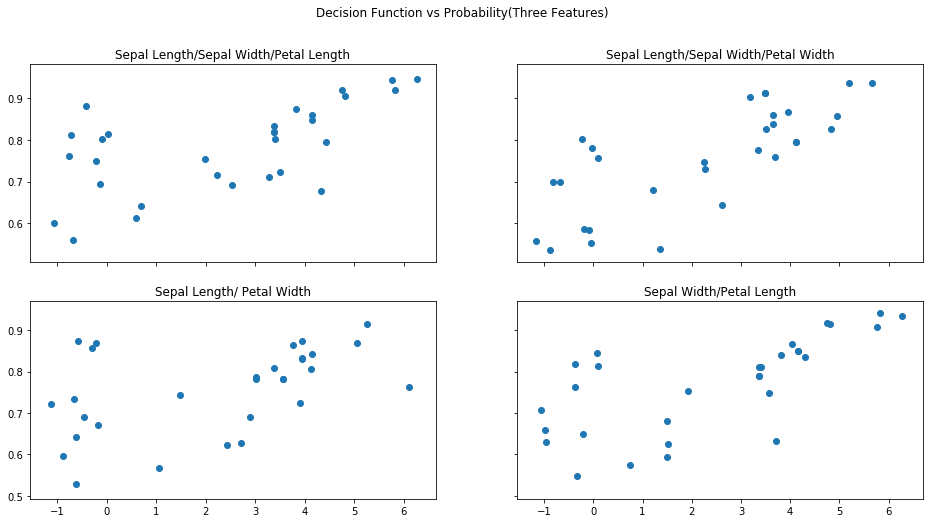

In [171]:
sl_sw_pl_probs = [max(probs[6][i]) for i in range(30)] 
sl_sw_pl_dec = [max(decision_func_results[6][i]) for i in range(30)]

sl_sw_pw_probs = [max(probs[7][i]) for i in range(30)] 
sl_sw_pw_dec = [max(decision_func_results[7][i]) for i in range(30)]

sl_pl_pw_probs = [max(probs[8][i]) for i in range(30)] 
sl_pl_pw_dec = [max(decision_func_results[8][i]) for i in range(30)]

sw_pl_pw_probs = [max(probs[9][i]) for i in range(30)] 
sw_pl_pw_dec = [max(decision_func_results[9][i]) for i in range(30)]

#Plots using three features at a time 
f, plts = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(16,8))
f.suptitle('Decision Function vs Probability(Three Features)')

plts[0][0].scatter(sl_sw_pl_dec, sl_sw_pl_probs)
plts[0][0].set_title('Sepal Length/Sepal Width/Petal Length')

plts[0][1].scatter(sl_sw_pw_dec, sl_sw_pw_probs)
plts[0][1].set_title('Sepal Length/Sepal Width/Petal Width')

plts[1][0].scatter(sl_pl_pw_dec, sl_pl_pw_probs)
plts[1][0].set_title('Sepal Length/ Petal Width')

plts[1][1].scatter(sw_pl_pw_dec, sw_pl_pw_probs)
plts[1][1].set_title('Sepal Width/Petal Length')



Text(0.5,1,'Decision function vs Probability for all features')

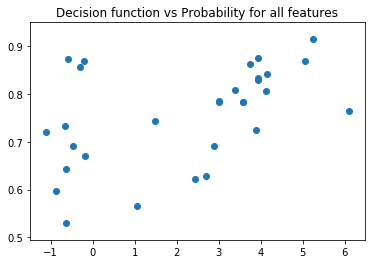

In [172]:
# plot using all features
all_probs = [max(probs[8][i]) for i in range(30)] 
all_dec = [max(decision_func_results[8][i]) for i in range(30)]

plt.scatter(all_dec, all_probs)
plt.title('Decision function vs Probability for all features')


## Concluding Remarks

The above code demonstrates a flexible and widely used learning model which provides functionality on linearly inseperable data and provides metrics for confidence testing. Benefitting from properties of the limits of the logit function, the logistic regression algorithm is able to map decision function inputs to probabilities of each classification, giving us an idea of how decisive the classification is. The above analysis may be run multiple times in this notebook to see a number of computations. However, from the table displaying scores, it is apparent that the use of more features generally results in higher accuracy. In addition, playing with the regularization, or the cost function used, which can be set to either 'L1' or 'L2' in the 'penalty' parameter of the LogisticRegression() function in sklearn, shows that L1 regularization generally performs better as it takes more iterations for convergence. For that reason, the max_iter parameter of the training function need be adjusted to ensure convergence. Finally, the purpose of the above plots, which can be observe for multiple runs of this program, is to demonstrate the linear trend between confidence function and probabilty of correctness on the predicted output, hence showing the underlying mechanism of the algorithm. 